<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.04/bds_algoritmos_007_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Modelos no supervisados: Clustering</font>**


<p align="justify">
Las técnicas de clustering consisten en un conjunto de metodologías que buscan obtener subgrupos en los datos. Dentro de cada subgrupo las observaciones deben ser similares y heterogeneas en comparación con elementos de otros grupos.
<br>
<br>
👀 Cuando se hace un análisis clustering se parte de la premisa de que los datos no se han distribuido de forma completamente aleatoria y por lo tanto existen patrones en ellos que nos pueden dar información. Son técnicas de aprendizaje no supervisado por el hecho de que no existe una variable output que tratamos de predecir.
<br>
<br>
La partición en grupos tiene que cumplir las siguientes condiciones. Sean  $C_1,...,C_k$ los cluster formados, estos deben cumplir:

 1. $C_1\cup C_2 \cup ...\cup C_k = \{1,...,n\} $ o sea cada observación pertenece a al menos uno de los  $K$  subgrupos.
 2. $C_i \cap C_j = \emptyset$ para todo $i \neq j$ . En otras palabras los agrupamientos no se superponen.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

 # **<font color="DeepPink">K-Means</font>**

<p align="justify">
La idea detrás de <i>K-means clustering</i> es que existe un buen agrupamiento si la disimilitud dentro de cada cluster es la menor posible. Entonces podemos plantear el problema cómo la minimización de un función dada de la siguiente forma:
<br>
<br>
\begin{equation}
min_{C_1,...,C_K} \left(\sum_{k=1}^{K} W\left(C_k\right)\right)
\end{equation}
<br>
en dónde $W$  es la función de disimilitud de intra-cluster. En palabras, se busca una partición de los datos en  $K$  grupos en dónde la suma total de las disimilitudes sea la menor posible.
<br>
<br>
La función de disimilitud puede definirse de muchas maneras, pero la más habitual es la <b>distancia Euclídea</b>.
<br>
<br>
\begin{equation}
W\left(C_k\right) = \frac{1}{\left|C_k\right|} \sum_{i,i'∈C_k}\sum_{j=1}^p \left(x_{ij}-x_{i'j}\right)^2
\end{equation}
<br>
Donde $\left|C_k\right|$  refleja el número de observaciones dentro del cluster $k$.
<br>
<br>
Encontrar una solución a ese problema es realmente un problema muy difícil ya que existen  $K^n$  formas de dividir las observaciones dentro de  $K$  grupos. Esto es un número muy grande aún cuando haya pocos datos.
<br>
<br>
Para resolverlo, entonces, existen algoritmos que llegan a soluciones locales.

1. Asignar aleatoriamente de 1 a  $K$  clusters a cada dato.
2. Iterar hasta que la asignación de clusters deje de cambiar:
    - Por cada cluster calcular el centroide.
    - Asignara a cada observación el cluster del centroide más cercano.

<p align="justify">
Tomemos un ejemplo sencillo para ver como agruparíamos.
<br>
<br>
Desde los datos de ejemplos del precio de de viviendas de California, queremos separar en dos grupos de regiones de acuerdo al valor promedio de las viviendas.

In [2]:
house = pd.read_csv("sample_data/california_housing_train.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


 ## **<font color="DeepPink">1. Asignamos aleatoriamente un grupo a cada punto</font>**  

 ### **<font color="DeepPink">Con MatPlotLib</font>**  

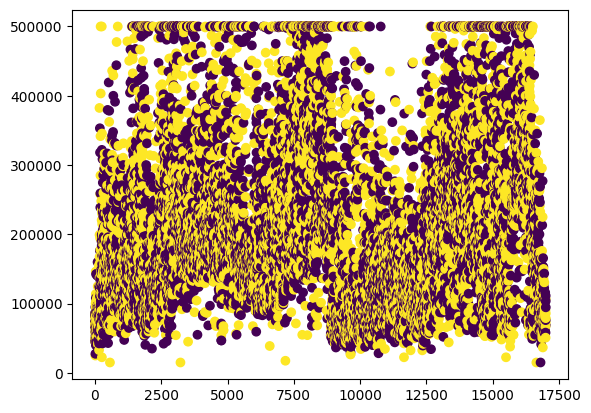

In [3]:
cate = np.round(np.random.rand(len(house)),0)

plt.scatter(x = np.array(house.index), y = house.median_house_value, c = cate)


 ### **<font color="DeepPink">Con Plotly</font>**  

In [8]:
px.scatter(x = np.array(house.index),
           y = house.median_house_value,
           color = cate,
           template = "gridon")

 ## **<font color="DeepPink">2 . Calculamos los centroides y asignamos a que grupo pertenece cada punto</font>**  

In [9]:
centroides = house.groupby(cate).mean()['median_house_value']
centroides

0.0    207135.117025
1.0    207459.943644
Name: median_house_value, dtype: float64

Asignamos cada punto al centroide más cercano.

 ### **<font color="DeepPink">Con MatPlotLib</font>**  

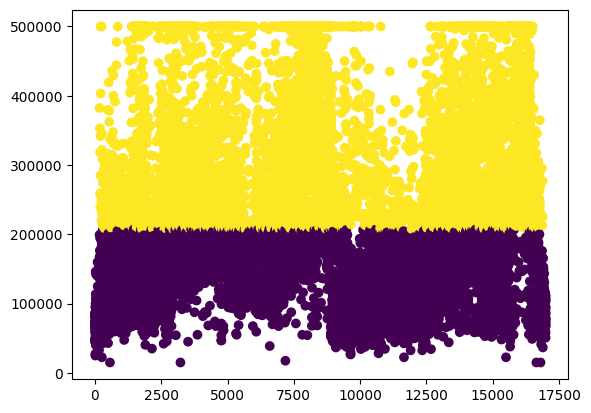

In [10]:
ncate = []

for i in house.median_house_value:
  g0 = (i-centroides.iloc[0])**2    #distancia del punto i al centroide 0
  g1 = (i-centroides.iloc[1])**2    #distancia del punto i al centroide 1
  if g0 < g1:
    ncate.append(0)
  else:
    ncate.append(1)

plt.scatter(x = np.array(house.index), y = house.median_house_value, c = ncate)


 ### **<font color="DeepPink">Con Plotly</font>**  

In [11]:
px.scatter(x = np.array(house.index),
           y = house.median_house_value,
           color = ncate,
           template = "gridon")

 ## **<font color="DeepPink">3 . Repetimos el paso 2</font>**  

In [12]:
centroides = house.groupby(ncate).mean()['median_house_value']
centroides

0    130226.852281
1    320312.304367
Name: median_house_value, dtype: float64

 ### **<font color="DeepPink">Con MatPlotLib</font>**  

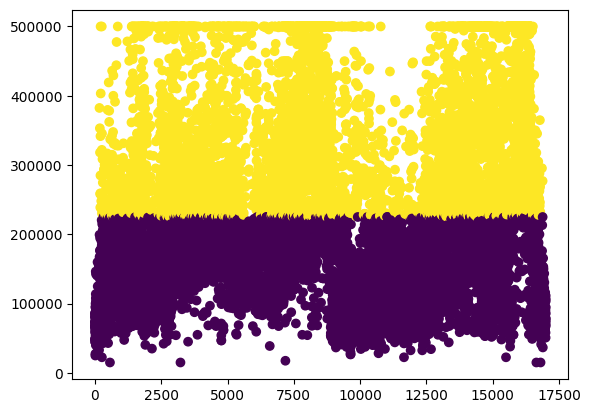

In [14]:
ncate = []

for i in house.median_house_value:
  g0 = (i-centroides.iloc[0])**2
  g1 = (i-centroides.iloc[1])**2
  if g0 < g1:
    ncate.append(0)
  else:
    ncate.append(1)

plt.scatter(x = np.array(house.index), y = house.median_house_value, c = ncate)

 ### **<font color="DeepPink">Con Plotly</font>**  

In [15]:
px.scatter(x = np.array(house.index),
           y = house.median_house_value,
           color = ncate,
           template = "gridon")

In [16]:
centroides = house.groupby(ncate).mean()['median_house_value']
centroides

0    137805.869243
1    337167.282146
Name: median_house_value, dtype: float64

<p align="justify">
¿Qué pasa ahora si queremos agrupar unidades pero con dos características? Por supuesto, si aplicamos la categorización anterior solo va tener en cuenta el valor medio de los hogares y no la antigüedad de la casa.

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

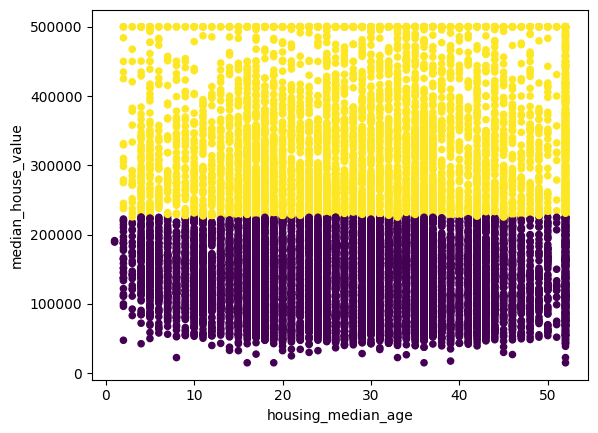

In [17]:
house[['housing_median_age',
       'median_house_value']].plot(kind = 'scatter',
                                   x = 'housing_median_age',
                                   y = 'median_house_value',
                                   c = ncate)

<p align="justify">
El proceso, es exáctamente el mismo solo que ahora hay que tener en cuenta que los centroides se corresponden a dos variables y las distancias se deben calcular por cada uno de ellos.

In [18]:
df = house[['housing_median_age','median_house_value']]
cate = np.round(np.random.rand(len(house)),0)   #asignamos aleatoriamente los valores
centroides = df.groupby(cate).mean()            #calculamos los centroides de acuerdo a los grupos aleatorios

ncate = []
columnas = df.columns

for ind in range(len(df)):
  g0 = 0
  g1 = 0
  for c in columnas:                            #calculamos las distancias por cada una de las columnas del dataframe
    i = df.iloc[ind]
    g0 += (i[c]-centroides.iloc[0][c])**2       #distancia de la columna "c" a su respectivo centroide
    g1 += (i[c]-centroides.iloc[1][c])**2
  if g0 < g1:
    ncate.append(0)
  else:
    ncate.append(1)


<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

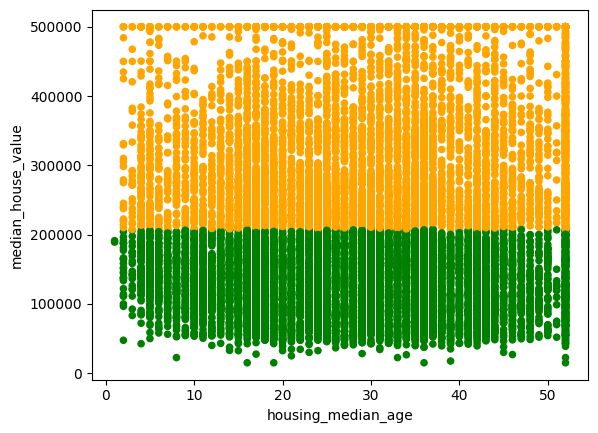

In [19]:
color = []
for i in ncate:
  if i == 0:
    color.append('green')
  else:
    color.append('orange')

house[['housing_median_age','median_house_value']].plot(kind = 'scatter',x = 'housing_median_age', y = 'median_house_value', c = color)

<p align="justify">
El problema que estamos teniendo es de escalas. La antigüedad de la vivienda maneja valores muy menores al precio promedio de las viviendas y es por eso que esta variable prácticamente no influye en la asignación de grupos. Estos métodos necesitan si o sí el escalado de variables.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(house[['housing_median_age','median_house_value']])
X = pd.DataFrame(X, columns =['housing_median_age','median_house_value'] )
X.head()

,housing_median_age,median_house_value
0,-1.079671,-1.210558
1,-0.761872,-1.096745
2,-0.920772,-1.048461
3,-1.159121,-1.154514
4,-0.682422,-1.222629


<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

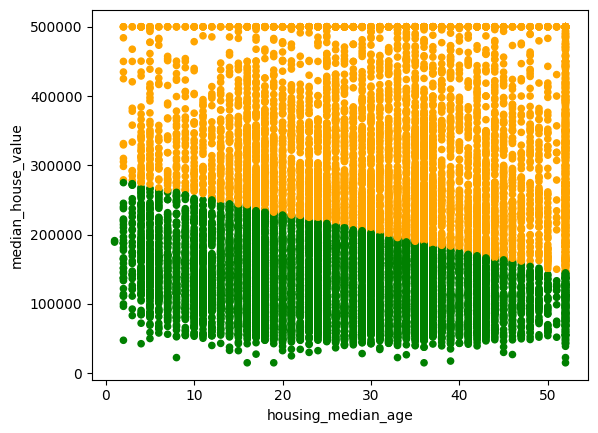

In [21]:
veces = 3
df = X
cate = np.round(np.random.rand(len(X)),0)
centroides = df.groupby(cate).mean()

for v in range(veces):
  ncate = []
  columnas = df.columns

  for ind in range(len(df)):
    g0 = 0
    g1 = 0
    for c in columnas:
      i = df.iloc[ind]
      g0 += (i[c]-centroides.iloc[0][c])**2
      g1 += (i[c]-centroides.iloc[1][c])**2
    if g0 < g1:
      ncate.append(0)
    else:
      ncate.append(1)


color = []
for i in ncate:
  if i == 0:
    color.append('green')
  else:
    color.append('orange')

house[['housing_median_age','median_house_value']].plot(kind = 'scatter',x = 'housing_median_age', y = 'median_house_value', c = color)

 # **<font color="DeepPink">Agglomerative clustering</font>**

<p align="justify">
Una de las desventejas de K-means es que hay que elegir el número de grupos antes de iniciar el algoritmo. Los agrupamientos jerárquicos permiten iniciar el método sin la necesidad de comprometerse con el número de grupos que buscamos. Además tiene otra ventaja, ofrecen una representacíon de tipo árbol de decisión que se denomina dendrograma.
<br>
<br>
El <b>dendrograma</b> se va formando con la unión de las observaciones que son parecidas entre sí. Se inicia de las más parecidas que hay, sería las ramas más bajas, luego se van asociando los diferentes grupos a medida que sean más parecidos. Así hasta unir a todas las observaciones en un solo árbol.

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Dendograma-001.png?raw=true" width="600">
</p>

 ## **<font color="DeepPink">El algoritmo del clustering jerárquico</font>**

<p align="justify">
El algoritmo utilizado es muy simple. Primero hay que definir cual es la función de de disimilitud que se va utilizar. Luego se empieza fusionando las dos observaciones más similares, entonces quedan $n-1$ clústers. Luego se unen el otro par de grupos más similares, ahora quedan $n-2$. Así se continúa hasta que quedan todos en un solo grupo.


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Dendograma-002.png?raw=true" width="600">
</p>

<p align="justify">
Sin embargo aún queda definir una función de disimilitud que funcione entre grupos. Esto se denomina enlace (*linkage*) y existen 3 formas distintas de enlace.
<br>
<br>

- **Enlace completo**: se toma como dismilitud entre grupos la máxima dismilitud:

\begin{equation}
d_{CL}(A,B)= max_{i∈A, j∈B}\left(d(i,j)\right)
\end{equation}

- **Enlace simple**: se considera la mínima disimilitud:

\begin{equation}
d_{CL}(A,B)= min_{i∈A, j∈B}\left(d(i,j)\right)
\end{equation}

- **Enlace promedio**: se computa el promedio de todas las disimilutdes:

\begin{equation}
d_{AL}(A,B)= \frac{1}{\left|A\right|\left|B\right|}\sum_{i∈A}\sum_{j∈B}d(i,J)
\end{equation}

<p align="justify">
Existe otra forma de enlace que es la denominada <b>Ward</b>. Esta va evaluando la distancia de cada observación al centroide del grupo y va evaluando como se va empeorando esta distancia a medida que se agregan grupos.

In [22]:
house = house[['housing_median_age','median_house_value']][:30]
house.head()

,housing_median_age,median_house_value
0,15.0,66900.0
1,19.0,80100.0
2,17.0,85700.0
3,14.0,73400.0
4,20.0,65500.0


<p align="justify">
Para poder realizar un agrupamiento jerárquico lo primero que necesitamos hacer es calcular las distancias que existen entre los puntos.
<br>
<br>
Para hacerlo, vamos a utilizar la función <code>pdist</code> de la biblioteca <code>scipy</code>. La función recibe como parámetros un <code>array</code> o un <code>DataFrame</code> de $n \times m$, y una métrica que es la que nos va definir la función distancia que se va utilizar.
<br>
<br>
El resultado obtenido va ser un <code>array</code> de un largo de $\frac{n(n-1)}{2}$.
<br>
<br>
La función <code>squareform</code> de <code>scipy</code> convierte el array en una matriz cuadrada $n\times n$ con las distancias calculadas.

In [23]:
from scipy.spatial.distance import pdist, squareform
distancias = pd.DataFrame(squareform(pdist(house, metric = 'euclidean')), columns = house.index, index = house.index)
distancias.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,13200.000606,18800.000106,6500.000077,1400.008929,7100.013803,15500.003226,18400.018370,8500.021235,18800.025558,...,22500.000556,7700.005260,16900.000740,4400.000000,13400.000336,33100.005453,4200.026786,14000.000036,1700.084998,7400.004324
1,13200.000606,0.000000,5600.000357,6700.001866,14600.000034,6100.008197,2300.007826,31600.007658,21700.005184,32000.011391,...,35700.000014,20900.000598,30100.000017,8800.000909,26600.000019,19900.005653,9000.006722,800.015625,11500.007348,5800.001379
2,18800.000106,5600.000357,0.000000,12300.000366,20200.000223,11700.006154,3300.009697,37200.007742,27300.005293,37600.011184,...,41300.000109,26500.000925,35700.000126,14400.000139,32200.000016,14300.010105,14600.005788,4800.000937,17100.006579,11400.001579
3,6500.000077,6700.001866,12300.000366,0.000000,7900.002278,600.187471,9000.006722,24900.014639,15000.013333,25300.020237,...,29000.000621,14200.003521,23400.000769,2100.000238,19900.000402,26600.007519,2300.055652,7500.000000,4800.033750,900.044999
4,1400.008929,14600.000034,20200.000223,7900.002278,0.000000,8500.004765,16900.000740,17000.012971,7100.013803,17400.019425,...,21100.000000,6300.001270,15500.000000,5800.002155,12000.000167,34500.002841,5600.008929,15400.001169,3100.023226,8800.000511


<p align="justify">
Ahora nos queda ir agrupando las unidades de acuerdo a la similitud entre cada una de ellas. Para esto se utiliza lo que se denomina enlace (<i>linkage</i>).
<br>
<br>
También podemos utilizar para realizar estos enlaces una función de <code>scipy</code> denominada <code>linkage</code>.
<br>
<br>
Hiperparámetros:

 - `y`:  solicita una matriz de distancias condensada. Esto es la parte superior de una matriz triangular en un solo vector. Es el objeto que devuelve `pdist`. También se puede pasar una matriz con los datos, pero no un `DataFrame`.

- `mehod`: es el algoritmo de enlace a utilizar

- `metric`: es la métrica de distancia o disimilitud que se va utilizar.

<p align="justify">
Aplicamos la función con el método <code>linkage</code> usando como entrada la salida de <code>pdist</code>.

In [24]:
from scipy.cluster.hierarchy import linkage

complete_clusters = linkage(pdist(house, metric = 'euclidean') #utilizamos la salida de la función pdist
                  , method = 'complete', metric = 'euclidean')

También podemos usar la matriz de valores $n\times m$ para calcularlo

In [25]:
complete_clusters2 = linkage(house.values       #utilizamos los valores del dataframe en forma matricial
                             , method = 'complete', metric = 'euclidean')

(complete_clusters == complete_clusters2).all() #comprobamos que los resultados sean iguales

True

<p align="justify">
Para graficar el dendrograma podemos utilizar la función <code>dendrogram</code> que también es pertenceciente a la biblioteca <code>scipy</code>.

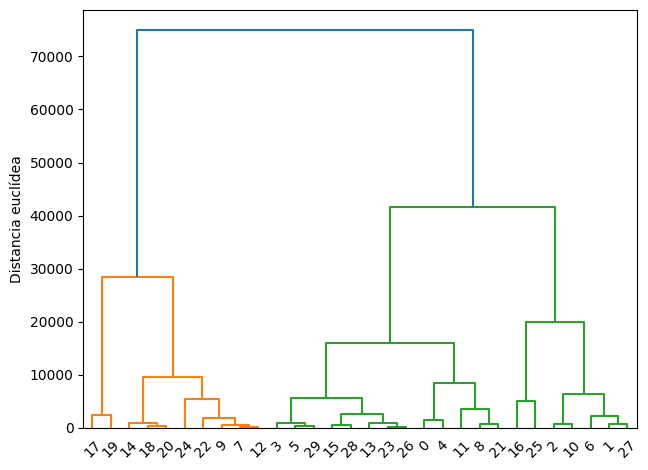

In [26]:
from scipy.cluster.hierarchy import dendrogram

dendro = dendrogram(complete_clusters #le pasamos como entrada la salida que obtuvimos al aplicar el linkage
                    , labels = house.index # Se agregan los ínidices del data frame para saber que observaciones agrupa
                    )
plt.tight_layout()
plt.ylabel('Distancia euclídea')
plt.show()

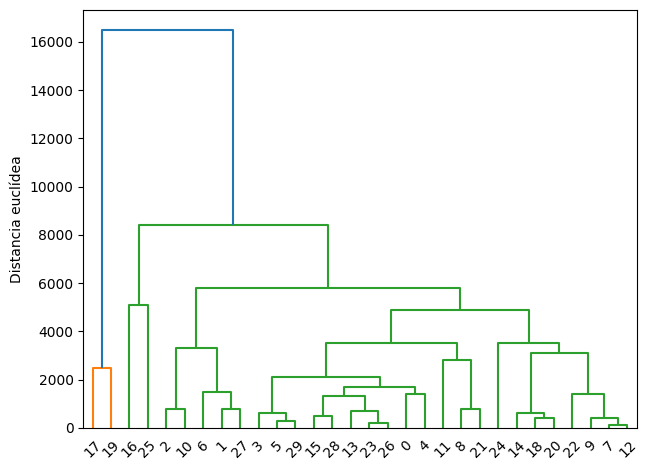

In [27]:
single_clusters = linkage(pdist(house, metric = 'euclidean'), method = 'single', metric = 'euclidean')
dendro = dendrogram(single_clusters, labels = house.index)
plt.tight_layout()
plt.ylabel('Distancia euclídea')
plt.show()

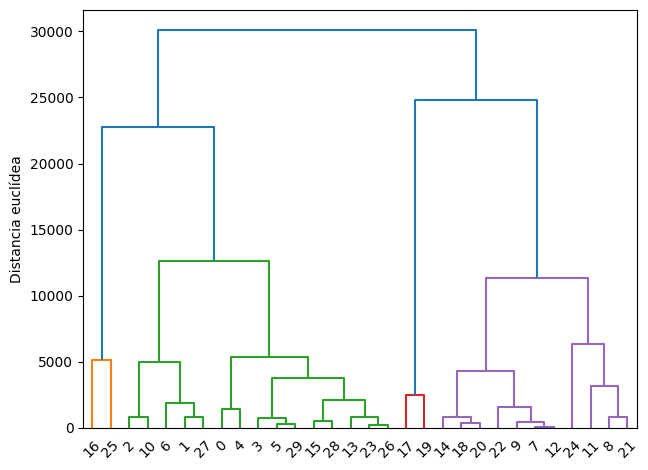

In [28]:
average_clusters = linkage(pdist(house, metric = 'euclidean'), method = 'average', metric = 'euclidean')
dendro = dendrogram(average_clusters, labels = house.index)
plt.tight_layout()
plt.ylabel('Distancia euclídea')
plt.show()

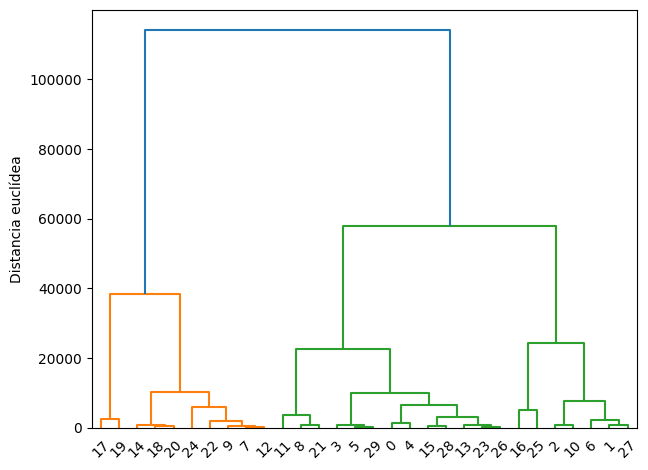

In [29]:
ward_clusters = linkage(pdist(house, metric = 'euclidean'), method = 'ward', metric = 'euclidean')
dendro = dendrogram(ward_clusters, labels = house.index)
plt.tight_layout()
plt.ylabel('Distancia euclídea')
plt.show()

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:
<br><br>
✅ Aprendimos como funciona el algorítmo de K-means internamente.
<br>
✅ Elaboramos un programa que agrupa unidades de acuerdo al algoritmo K-means.
<br>
✅ Aprendimos como funciona un algorítmo de agrupación jerárquica.
<br>
✅ Utilizamos la biblioteca <code>scipy</code> para construir matrices de distancias y dendrogramas.


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
